In [1]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [2]:
# import like this
items_path = "D:/CAMPUSX/assignments/items.csv"
q1_path = "D:/CAMPUSX/assignments/quarter-1.csv"
q2_path = "D:/CAMPUSX/assignments/quarter-2.csv"
q3_path = "D:/CAMPUSX/assignments/quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [3]:
df = pd.concat([q1,q2,q3],keys=['Q-1','Q-2','Q-3']).reset_index()

In [4]:
df

,level_0,level_1,order_id,quantity,item_id,choice_description_id,item_price
0,Q-1,0,1,1,1,1,$3.39
1,Q-1,1,1,1,2,2,$3.39
2,Q-1,2,2,2,4,3,$16.98
3,Q-1,3,4,1,7,6,$9.25
4,Q-1,4,6,1,9,8,$8.75
...,...,...,...,...,...,...,...
4617,Q-2,2342,1829,1,23,92,$11.25
4618,Q-2,2343,1830,1,23,1043,$11.25
4619,Q-2,2344,1832,1,10,116,$8.75
4620,Q-2,2345,1832,1,8,0,$4.45


In [5]:
items.head()

,item_id,item_name
0,0,Chips and Fresh Tomato Salsa
1,1,Izze
2,2,Nantucket Nectar
3,3,Chips and Tomatillo-Green Chili Salsa
4,4,Chicken Bowl


In [6]:
temp = df.merge(items,on='item_id')

In [7]:
temp.drop('level_1',axis=1,inplace=True)

In [8]:
temp['item_price'] = temp['item_price'].apply(lambda x: round((float(x.strip('$'))*82.70),2))

In [9]:
temp

,level_0,order_id,quantity,item_id,choice_description_id,item_price,item_name
0,Q-1,1,1,1,1,280.35,Izze
1,Q-1,12,1,1,18,280.35,Izze
2,Q-1,21,1,1,33,280.35,Izze
3,Q-1,30,1,1,33,280.35,Izze
4,Q-1,155,1,1,33,280.35,Izze
...,...,...,...,...,...,...,...
4617,Q-2,1094,1,48,755,702.12,Veggie Salad
4618,Q-2,1192,1,48,149,702.12,Veggie Salad
4619,Q-2,1263,1,48,306,702.12,Veggie Salad
4620,Q-2,1395,1,48,755,702.12,Veggie Salad


In [10]:
temp

,level_0,order_id,quantity,item_id,choice_description_id,item_price,item_name
0,Q-1,1,1,1,1,280.35,Izze
1,Q-1,12,1,1,18,280.35,Izze
2,Q-1,21,1,1,33,280.35,Izze
3,Q-1,30,1,1,33,280.35,Izze
4,Q-1,155,1,1,33,280.35,Izze
...,...,...,...,...,...,...,...
4617,Q-2,1094,1,48,755,702.12,Veggie Salad
4618,Q-2,1192,1,48,149,702.12,Veggie Salad
4619,Q-2,1263,1,48,306,702.12,Veggie Salad
4620,Q-2,1395,1,48,755,702.12,Veggie Salad


In [11]:
temp['total_sold'] = temp.quantity * temp.item_price

In [12]:
temp.groupby(['level_0'])['total_sold'].value_counts()

level_0  total_sold
Q-1      723.62        354
         930.38        244
         764.98        194
         368.02        177
         702.12        160
                      ... 
Q-2      6467.97         1
         6512.64         1
         8373.36         1
         8944.80         1
         11578.00        1
Name: total_sold, Length: 127, dtype: int64

In [13]:
temp.groupby(['level_0','item_name'])['total_sold'].sum().sort_values(ascending=False)

level_0  item_name                        
Q-2      Chicken Bowl                         346698.85
Q-1      Chicken Bowl                         318591.55
Q-2      Chicken Burrito                      269448.67
Q-1      Chicken Burrito                       258760.6
Q-2      Steak Burrito                        179706.72
                                                ...    
Q-1      Carnitas Salad                          743.47
         Veggie Salad                            702.12
Q-2      Veggie Crispy Tacos                     702.12
         Bowl                                    611.98
Q-1      Chips and Mild Fresh Tomato Salsa        248.1
Name: total_sold, Length: 95, dtype: object

In [14]:
temp.groupby(['level_0'])['total_sold'].mean()

level_0
Q-1    725.387600
Q-2    679.441657
Name: total_sold, dtype: float64

###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [15]:
matches = pd.read_csv('D:/CAMPUSX/assignments/IPL_Matches_2008_2022.csv')
ball = pd.read_csv('D:/CAMPUSX/assignments/IPL_Ball_by_Ball_2008_2022.csv')
delivery = pd.read_csv('D:/CAMPUSX/assignments/ipl_deliveries.csv')

In [16]:
delivery.head(2)

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Rajasthan RoyalsGujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,1312200,Rajasthan RoyalsGujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans


In [17]:
ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [18]:
wickets = ball[ball.isWicketDelivery == 1]['bowler'].value_counts().to_frame().rename(columns={'bowler':'wickets'})

In [19]:
overs_runs = ball.groupby(['bowler'])[['overs','total_run']].agg({'overs':'count','total_run':'sum'}).reset_index()

In [20]:
overs_runs['bowler_economy'] = (overs_runs.total_run / overs_runs.overs).round(3)

In [21]:
overs_runs

,bowler,overs,total_run,bowler_economy
0,A Ashish Reddy,270,400,1.481
1,A Badoni,12,12,1.000
2,A Chandila,234,245,1.047
3,A Choudhary,108,144,1.333
4,A Dananjaya,25,47,1.880
...,...,...,...,...
467,YK Pathan,1184,1443,1.219
468,YS Chahal,2940,3699,1.258
469,Yash Dayal,205,296,1.444
470,Yuvraj Singh,882,1091,1.237


In [22]:
# code here
wickets = wickets.reset_index().rename(columns={'index':'bowler'})

In [23]:
wickets.merge(overs_runs,on='bowler')[['bowler','wickets','bowler_economy']].sort_values(by=['wickets','bowler_economy'],ascending=[False,True])

,bowler,wickets,bowler_economy
0,DJ Bravo,207,1.346
1,SL Malinga,188,1.172
2,A Mishra,175,1.213
3,R Ashwin,174,1.142
4,YS Chahal,172,1.258
...,...,...,...
399,TP Sudhindra,1,1.851
393,CL White,1,1.870
391,LMP Simmons,1,1.889
406,Mashrafe Mortaza,1,2.107


###`Q-7:` Best bowler in death overs. 
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [24]:
death_over = ball[(ball.overs >=16) & (ball.overs <= 20) & (ball.isWicketDelivery == 1)]['bowler'].value_counts().reset_index().rename(columns={'index':'bowler','bowler':'wickets'})

In [25]:
death_over

,bowler,wickets
0,DJ Bravo,115
1,SL Malinga,104
2,B Kumar,82
3,JJ Bumrah,79
4,SP Narine,64
...,...,...
296,PV Tambe,1
297,DJ Hooda,1
298,GS Sandhu,1
299,JW Hastings,1


In [26]:
death_over.merge(overs_runs,on='bowler')[['bowler','wickets','bowler_economy']].sort_values(['wickets','bowler_economy'],ascending=[False,True])

,bowler,wickets,bowler_economy
0,DJ Bravo,115,1.346
1,SL Malinga,104,1.172
2,B Kumar,82,1.201
3,JJ Bumrah,79,1.225
4,SP Narine,64,1.111
...,...,...,...
294,K Santokie,1,1.784
298,GS Sandhu,1,1.792
283,MK Tiwary,1,1.844
250,Mashrafe Mortaza,1,2.107


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [48]:
a = ['Season','innings','batter']

In [49]:
temp = delivery.merge(matches,on='ID')

In [50]:
avg = temp.groupby(a)[['total_run','player_out']].agg({
    'total_run':'sum',
    'player_out':'count'
})

In [51]:
avg['avg'] = (avg.total_run / avg.player_out).round(2)

In [52]:
avg

total_run  player_out    avg
Season  innings batter                                         
2007/08 1       A Chopra                  43           3  14.33
                A Kumble                   9           0    inf
                A Mishra                   4           1   4.00
                A Symonds                169           2  84.50
                AB Agarkar                35           3  11.67
...                                      ...         ...    ...
2022    2       VR Iyer                  115           6  19.17
                WP Saha                  246           6  41.00
                Washington Sundar         66           4  16.50
                YBK Jaiswal              157           3  52.33
                YS Chahal                  5           1   5.00

[3938 rows x 3 columns]

In [53]:
 condition = ~(temp.extra_type == 'wides') & ~((temp.isWicketDelivery == 1 ) & ((temp.extra_type == 'noballs') | (temp.extra_type == 'wides'))) & ~((temp.isWicketDelivery == 1 ) & (temp['non-striker'] == temp.player_out))

In [54]:
sr = temp[condition].groupby(a)[['total_run','ballnumber']].agg({
    'total_run':'sum',
    'ballnumber':'count'
})

In [55]:
sr['strike_rate'] = ((sr.total_run / sr.ballnumber)*100).round(3)

In [56]:
sr

total_run  ballnumber  strike_rate
Season  innings batter                                               
2007/08 1       A Chopra                  40          49       81.633
                A Kumble                   9           9      100.000
                A Mishra                   4           5       80.000
                A Symonds                163         105      155.238
                AB Agarkar                34          31      109.677
...                                      ...         ...          ...
2022    2       VR Iyer                  113         100      113.000
                WP Saha                  241         184      130.978
                Washington Sundar         64          39      164.103
                YBK Jaiswal              150          98      153.061
                YS Chahal                  5           8       62.500

[3932 rows x 3 columns]

In [57]:
temp.columns

Index(['ID', 'Team', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'BowlingTeam', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1',
       'Umpire2'],
      dtype='object')

In [58]:
x = temp.groupby(['Season','innings','ID','batter'])['batsman_run'].sum().reset_index()


In [62]:
highest_score = x.groupby(a)['batsman_run'].max().reset_index()

In [68]:
temp1 = temp.groupby(a)['total_run'].sum().reset_index()

In [85]:
final = temp1.merge(avg,on=a).drop(['total_run_x','total_run_y','player_out'],axis=1).merge(highest_score,on=a).rename(columns={'batsman_run':'highest_score'}).merge(sr,on=a).drop(['total_run','ballnumber'],axis=1).set_index('Season')

In [86]:
final

,innings,batter,avg,highest_score,strike_rate
Season,,,,,
2007/08,1,A Chopra,14.33,24,81.633
2007/08,1,A Kumble,inf,3,100.000
2007/08,1,A Mishra,4.00,4,80.000
2007/08,1,A Symonds,84.50,117,155.238
2007/08,1,AB Agarkar,11.67,15,109.677
...,...,...,...,...,...
2022,2,VR Iyer,19.17,50,113.000
2022,2,WP Saha,41.00,68,130.978
2022,2,Washington Sundar,16.50,40,164.103


In [87]:
def batsman_name(a):
    return final[final.batter == a]

In [90]:
batsman_name('V Kohli')

,innings,batter,avg,highest_score,strike_rate
Season,,,,,
2007/08,1,V Kohli,18.71,38,100.855
2007/08,2,V Kohli,11.20,23,138.462
2009,1,V Kohli,16.40,22,102.500
2009,2,V Kohli,29.33,50,122.302
2009/10,1,V Kohli,31.00,58,147.500
2009/10,2,V Kohli,21.78,42,148.462
2011,1,V Kohli,48.00,70,127.027
2011,2,V Kohli,43.56,71,121.543
2012,1,V Kohli,43.80,73,120.787


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [92]:
# code here


Index(['ID', 'Team', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'BowlingTeam', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1',
       'Umpire2'],
      dtype='object')

In [144]:
temp1 = temp[temp.batter == temp.Player_of_Match].groupby(['ID','Player_of_Match'])[['batsman_run','ballnumber']].agg({
    'batsman_run':'sum',
    'ballnumber':'count'
})

In [145]:
temp1['BattingFigure'] =temp1.batsman_run.astype(str)+'/'+temp1.ballnumber.astype(str)

In [147]:
temp1.drop(['batsman_run','ballnumber'], axis=1, inplace=True)

In [155]:
temp1.reset_index(inplace=True)

In [148]:
temp2 = temp[temp.Player_of_Match == temp.bowler].groupby(['ID','Player_of_Match'])[['isWicketDelivery','total_run']].sum().rename(columns={'isWicketDelivery':'wickets','total_run':'runs_conceded'})

In [149]:
temp2['BowlingFigure'] = temp2.wickets.astype(str)+'/'+temp2.runs_conceded.astype(str)

In [150]:
temp2.drop(['wickets','runs_conceded'],axis =1,inplace=True)

In [156]:
temp2.reset_index(inplace=True)

In [159]:
final = temp1.merge(temp2,on=['ID','Player_of_Match'],how='outer')

In [161]:
final[final['Player_of_Match'] == 'V Kohli']

,ID,Player_of_Match,BattingFigure,BowlingFigure
157,501227,V Kohli,56/40,NaN
160,501232,V Kohli,67/43,NaN
263,598017,V Kohli,65/51,NaN
290,598048,V Kohli,93/51,NaN
305,598068,V Kohli,56/29,NaN
398,829807,V Kohli,44/19,NaN
417,980937,V Kohli,100/64,NaN
431,980969,V Kohli,108/58,NaN
439,980995,V Kohli,75/51,NaN
440,980999,V Kohli,113/51,NaN


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [162]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

In [252]:
v = virginica.merge(sepal_all,on='Id').drop(['Unnamed: 0_x','Unnamed: 0_y','SepalWidthCm'],axis=1)

In [256]:
s = setosa.merge(petal_all,on='Id').drop(['Unnamed: 0_x','Unnamed: 0_y','PetalWidthCm'],axis=1)

<AxesSubplot:xlabel='Species'>

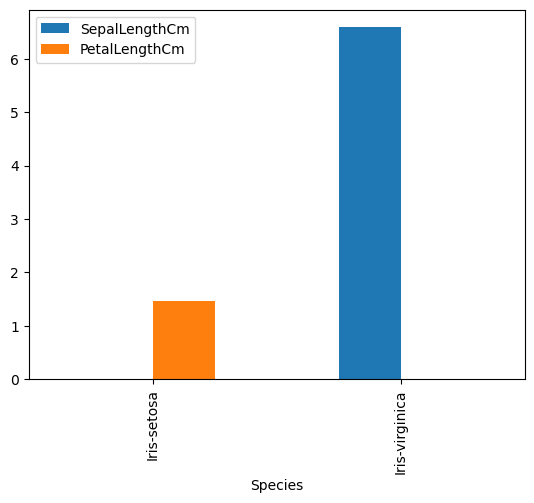

In [266]:
v.merge(s,on=['Id','Species'],how='outer').groupby('Species')[['SepalLengthCm','PetalLengthCm']].mean().plot(kind='bar')

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle. 

In [306]:
species = pd.concat([setosa,versicolor,virginica]).drop('Unnamed: 0',axis=1)

In [307]:
length_all= sepal_all.merge(petal_all,on='Id').drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1)

In [309]:
df = species.merge(length_all,on='Id')

In [311]:
df.sample(len(df))

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
55,56,Iris-versicolor,5.7,2.8,4.5,1.3
5,6,Iris-setosa,5.4,3.9,1.7,0.4
43,44,Iris-setosa,5.0,3.5,1.6,0.6
64,65,Iris-versicolor,5.6,2.9,3.6,1.3
70,71,Iris-versicolor,5.9,3.2,4.8,1.8
...,...,...,...,...,...,...
15,16,Iris-setosa,5.7,4.4,1.5,0.4
107,108,Iris-virginica,7.3,2.9,6.3,1.8
79,80,Iris-versicolor,5.7,2.6,3.5,1.0
144,145,Iris-virginica,6.7,3.3,5.7,2.5


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [316]:
# code here
s = setosa.merge(sepal_all,on='Id').drop(['Unnamed: 0_x','Unnamed: 0_y','SepalLengthCm'],axis=1)

In [318]:
v = versicolor.merge(petal_all,on='Id').drop(['Unnamed: 0_x','Unnamed: 0_y','PetalLengthCm'],axis=1)

In [330]:
final = s.merge(v,on=['Id','Species'],how='outer').groupby('Species')[['SepalWidthCm','PetalWidthCm']].agg({
    'SepalWidthCm':['min','max'],
    'PetalWidthCm':['min','max'],
})

In [337]:
final.iloc[0][1]

4.4

In [349]:
print('''Minimum Sepal width of Setosa is {}
Maximum Sepal width of Setosa is {}
'''.format(final.iloc[0][0],final.iloc[0][1]))
print('*'*50)
print('''Minimum Petal width of Versicolor is {}
Maximum Petal width of Versicolor is {}
'''.format(final.iloc[1][2],final.iloc[1][3]))
print('*'*50)

Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************
Minimum Petal width of Versicolor is 1.0
Maximum Petal width of Versicolor is 1.8

**************************************************
